# MIP Search App

Search facility for Museums in the Pandemic project. 
Birkbeck, University of London and King's College London.

Author & maintainer: andrea.ballatore [at] kcl.ac.uk

## Setup
Run this cell only once and the app should keep working for several days. It will take up to 5 minutes to download and install the necessary files. If the page stops working, reload it and run this cell again.

In [1]:
print("Downloading source code...")
!wget -q https://www.dropbox.com/s/at7z91d2lidordi/search_utils.py?dl=1 -O search_utils.py
!wget -q https://www.dropbox.com/s/7jbbewmgdvyh3wa/museums_wattributes-2020-02-23.tsv?dl=1 -O museums_wattributes-2020-02-23.tsv
print("Downloading DB...")
!wget -q https://www.dropbox.com/s/b52zdrf4cbcmcwx/mip_corpus_search.db.gz?dl=1 -O mip_corpus_search.db.gz
print("Uncompressing DB...")
!gunzip mip_corpus_search.db.gz
%run search_utils.py

Uncompressing DB...
ok


## Search

Syntax: * means 'any character'

In [58]:
#@title Search corpus { display-mode: "form" }
%run search_utils.py
search_string = "closure" #@param {type:"string"}
search_string_not = "road" #@param {type:"string"}
case_sensitive = False #@param {type:"boolean"}
search_websites = False
search_website_sentences = True #@param {type:"boolean"}
search_facebook = True #@param {type:"boolean"}
search_twitter = True #@param {type:"boolean"}
museum_name = "" #@param {type:"string"}
museum_governance = "" #@param {type:"string"}
museum_size = "small" #@param {type:"string"}
begin_date = "2019-01-01" #@param {type:"date"}
end_date = "2021-11-28" #@param {type:"date"}
max_results =  50#@param {type:"integer"}
context_window =  10#@param {type:"integer"}

res_df = run_search(search_string, search_string_not, case_sensitive,
           search_facebook, search_twitter, search_websites, 
           search_website_sentences, 
           museum_name, museum_governance, museum_size, 
           begin_date, end_date)
if len(res_df) > 0:
  results_html, results_page_df = generate_html_matches(res_df, search_string, 
    case_sensitive, context_window, max_results)
  display(HTML(results_html))
#res_df

ok
Date range: 2019-01-01 to 2021-11-28
Excluding 'road' from results.
Searching only 1825 museums with name:'', governance:'', size:'small'
WEBSITES: 1340 matches found. N sessions: 10. Unique museums: 173
FACEBOOK: 1196 matches found. Unique museums: 202
TWITTER: 2768 matches found. Unique museums: 276
Duplicates removed (from 5304 to 3890)
search_regex: '(?i)\bclosure\b'


res,museum_id,account,before,match,after,msg_time
766,mm.mgs.418,MorayCouncil,⛔️ Marywell Footbridge,closure,⛔️ Marywell Footbridge is closed to pedestrians until further,2021-10-15
155,mm.fcm.090,edencamp,📣Temporary,Closure,Notice📣 Due to necessary restoration of our 80year old,2021-10-13
379,mm.aim.0600,ExperienceWakefield,his wife Bridget Gill showing what comes after the,closure,of an area's main industry and focal point. The,2021-10-13
622,mm.musa.386,winchestercathedral,to 4:00pm for a funeral service. Please check the,Closure,Notices when planning your visit: https://www.winchester-cathedral.org.uk/planning-your-visit/closure-notices,2021-10-12
542,mm.domus.SC269,TaighChearsabhagh,✖️,CLOSURE,"DAY: THURSDAY ✖️ Due to a planned electricity interruption,",2021-10-12
620,mm.musa.386,winchestercathedral,watch this service via the Live Stream 💻 All,closure,notices are available on the website: http://ow.ly/ZN1H50GozG,2021-10-08
33,mm.ace.1213,Brighton.Toy.Museum,"Christmas. We hope you understand, and that our brief",closure,won't cause too much disappointment,2021-10-02
571,mm.mgs.372,NHSTayside,can be made available for someone else. Following the,closure,"of the Caird Hall as a community vaccination centre,",2021-09-24
681,mm.wiki.452,CadwWales,SITE,CLOSURE,- TINTERN ABBEY Due to a planned power cut,2021-09-20
362,mm.mald.082,CadwWales,SITE,CLOSURE,- TINTERN ABBEY Due to a planned power cut,2021-09-20


# Analyse search results

Run this cell to get an analysis of the composition of search results generated above in terms of museum attributes (governance, size, etc).

ok
Search: "closure" • Date range: 2019-01-01 to 2021-11-28 • 
N results: 97 • N unique museums: 11


,platform,n_results,museum_id
0,twitter,64,6
1,website_sentences,20,2
2,facebook,13,7


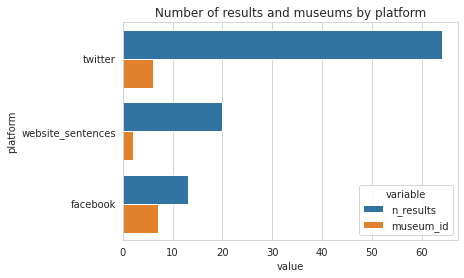

rt (18) closed (17) help (11) coronavirus (11) spread (11) restrict (11) please (9) 
staff (8) hi (7) gardens (7) kewgardens (6) visitors (6) hello (6) aware (6) 
caused (5) 'm (5) full (5) open (5) sorry (5) trust (4) 

page (10) regards (6) kind (6) 1/2 (6) ^z (5) monitored (5) support (5) 
today (4) beauty (4) government (4) remain (4) home (4) nature (4) hand (4) 
continuing (4) call (4) share (4) help (4) everybody (4) thank (4) 



,msg_time,size,session_id
0,2021-03-04,2,2021-03-04
1,2021-04-04,2,2021-04-04
2,2021-05-03,2,2021-05-03
3,2021-06-03,2,2021-06-03
4,2021-07-12,2,2021-07-12
5,2021-08-09,2,2021-08-09
6,2021-09-01,2,2021-09-01
7,2021-09-27,2,2021-09-27
8,2021-10-25,2,2021-10-25
9,2021-11-08,2,2021-11-08


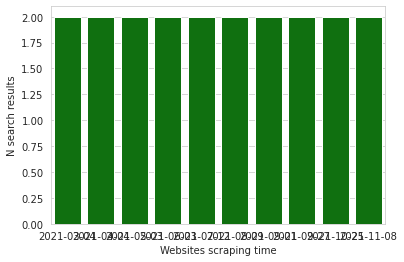

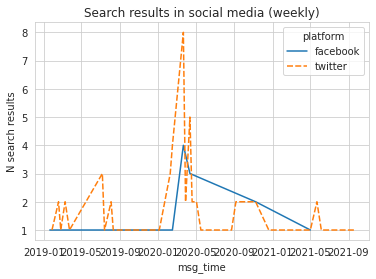

Unique museum results: 15


,attribute_value,n_museums,museum_result_pc,n_tot_museums,res_museum_attribute_pc,tot_museum_attribute_pc,divergence_pc
0,Independent:National Trust,10,66.7,183,5.5,5.5,61.2
1,Government:National,5,33.3,69,7.2,2.1,31.2


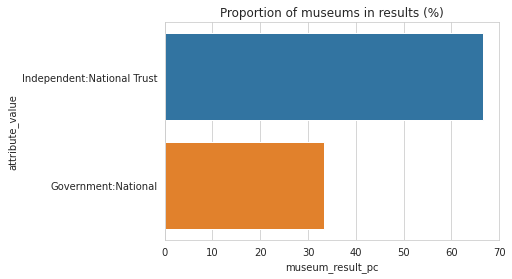

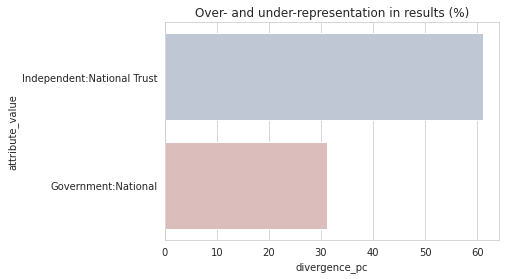

,attribute_value,n_museums,museum_result_pc,n_tot_museums,res_museum_attribute_pc,tot_museum_attribute_pc,divergence_pc
2,London,6,40.0,238,2.5,7.1,32.9
3,East Midlands,3,20.0,229,1.3,6.9,13.1
4,Northern Ireland,2,13.3,94,2.1,2.8,10.5
5,East of England,1,6.7,333,0.3,10.0,-3.3
6,South West,1,6.7,422,0.2,12.6,-5.9
7,Wales,1,6.7,207,0.5,6.2,0.5
8,West Midlands,1,6.7,228,0.4,6.8,-0.1


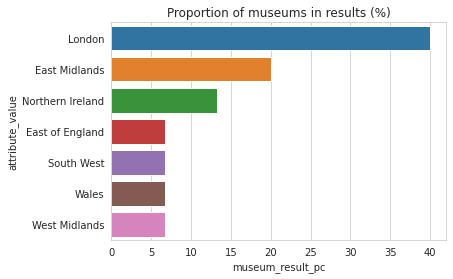

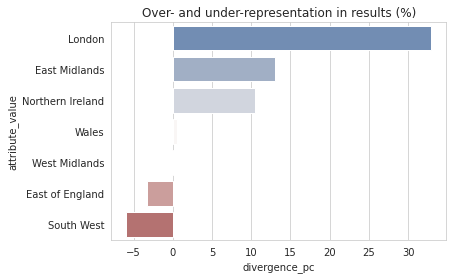

,attribute_value,n_museums,museum_result_pc,n_tot_museums,res_museum_attribute_pc,tot_museum_attribute_pc,divergence_pc
9,small,15,100.0,1825,0.8,54.6,45.4


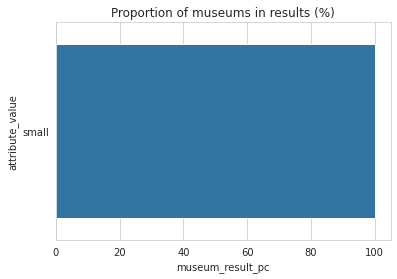

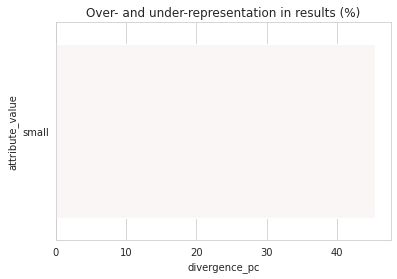

,attribute_value,n_museums,museum_result_pc,n_tot_museums,res_museum_attribute_pc,tot_museum_attribute_pc,divergence_pc
10,Buildings,9,60.0,553,1.6,16.6,43.4
11,Arts,3,20.0,247,1.2,7.4,12.6
12,Personality,3,20.0,176,1.7,5.3,14.7


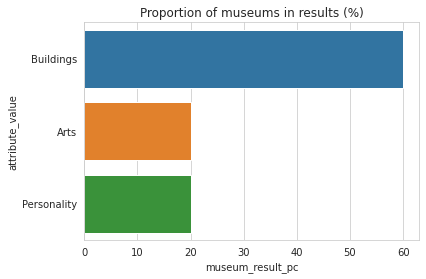

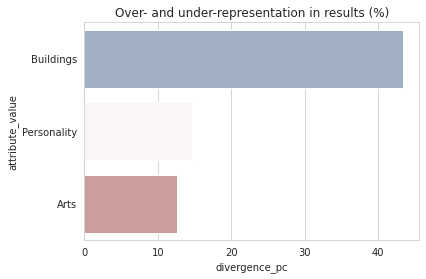

In [45]:
%run search_utils.py
#@title Analysis options { display-mode: "form" }
token_context_size =  10#@param {type:"integer"}
list_before_after_words_limit =  20#@param {type:"integer"}
assert len(res_df) > 0
res_attr_df = an_results(res_df, search_string, case_sensitive, token_context_size, list_before_after_words_limit)
#res_attr_df

### Download results as Excel or CSV

If save as Excel fails, try CSV.

In [ ]:
# click here to download the complete search results as EXCEL
fn = 'search_results_{}.xlsx'.format(get_now_string())
df = results_page_df.copy()
df['search'] = search_string
df.to_excel(fn, index=False)
files.download(fn)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# click here to download the complete search results as CSV
fn = 'search_results_{}.csv'.format(get_now_string())
df = results_page_df.copy()
df['search'] = search_string
df.to_csv(fn, index=False)
files.download(fn)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# click here to download the attribute analysis of results
fn = 'search_results_attributes_{}.xlsx'.format(get_now_string())
df = res_attr_df.copy()
df['search'] = search_string
df.to_excel(fn, index=False)
files.download(fn)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Backup application

This is for the platform's developer.

In [ ]:
files.download('search_utils.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>